In [1]:
import dadi
import msprime
import random
import numpy as np

In [2]:
def msprime_split_mig(s1, p):
    (nu1, nu2, T, m) = p
    dem = msprime.Demography()
    dem.add_population(name="A", initial_size=s1*10**nu1) # pop1 at present time
    dem.add_population(name="B", initial_size=s1*10**nu2) # pop2 at present time
    dem.add_population(name="C", initial_size=s1) # ancestral pop
    dem.add_population_split(time=2*s1*T, derived=["A", "B"], ancestral="C")
    dem.set_symmetric_migration_rate(["A", "B"], m/(2*s1))
    return dem

In [3]:
# dadi split_mig model params
nu1 = random.random() * 4 - 2 # nu1 in log scale
nu2 = random.random() * 4 - 2 # nu2 in log scale
T = random.random() * 1.9 + 0.1
m = random.random() * 9 + 1
p = (nu1, nu2, T, m)
p

(-1.3353102149928016,
 -1.6166462243875976,
 0.6104990118601223,
 1.9988074797042836)

In [4]:
# msprime demographic and ancestry simulation parameters (unchanged params)
s1 = 1e4 # ancestral pop size
ns = {"A":10, "B":10} # sample size
ploidy = 2 # diploid
mut = 1e-8 # mutation rate
# msprime demography params to alter for variance
seq_l = 1e8
recomb = 1e-8
# msprime demography model with dadi parameters
dem = msprime_split_mig(s1, p)
dem.debug()

In [5]:
# generate msprime ts
ts = msprime.sim_ancestry(samples=ns, ploidy=ploidy, demography=dem, 
                        sequence_length=seq_l, recombination_rate=recomb)
# add mutations
mts = msprime.sim_mutations(ts, rate=mut, discrete_genome=False)
mts.num_mutations

27263

In [6]:
# convert mts to afs 
# specifying sample nodes in the tree sequence for ts-to-afs conversion
# required only for joint afs (more than one population)
s0 = [node_id for node_id in range(0,20)]
s1 = [node_id for node_id in range(20,40)]
sample_nodes = [s0, s1]

afs = mts.allele_frequency_spectrum(sample_sets=sample_nodes,
                            polarised=True, span_normalise=False)
# convert to dadi fs
fs = dadi.Spectrum(afs)
# normalize
fs_norm = fs/fs.sum()

# # remove zero entries with the next min values in the spectrum
# non_zero_min = np.amin(fs_norm[fs_norm != 0])
# fs_norm[fs_norm == 0] = non_zero_min
# instead of doing this just specify vmin for plotting

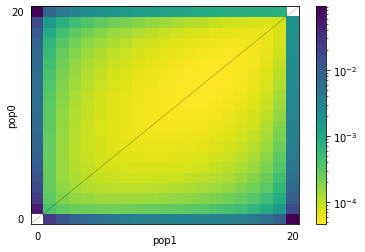

In [7]:
# plotting dadi equivalent spectrum--no error
func = dadi.Demographics2D.split_mig
func_ex = dadi.Numerics.make_extrap_func(func)
ns = [20,20]
pts_l = [40, 50, 60]
param = (10**p[0], 10**p[1], p[2], p[3])
fs_dadi = func_ex(param, ns, pts_l)
dadi.Plotting.plot_single_2d_sfs(fs_dadi)

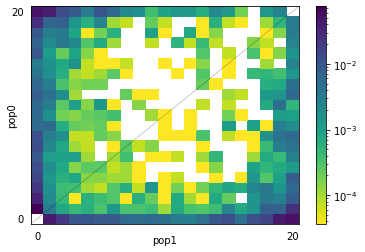

In [8]:
# plotting msprime converted spectrum--error
# has to set vmin to avoid having vmin=0 in the spectrum
# because plotting in log scale so zeros are not tolerated
# pick the min values between data and model spectra?
non_zero_min = np.amin(fs_norm[fs_norm != 0])
dadi_fs_min = np.amin(fs_dadi)
vmin = min(non_zero_min, dadi_fs_min)
dadi.Plotting.plot_single_2d_sfs(fs_norm, vmin=vmin)

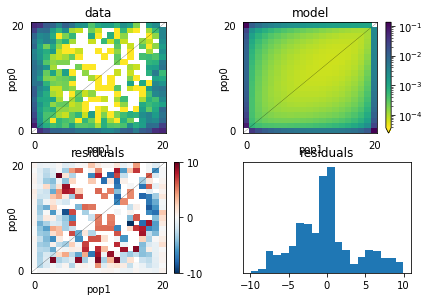

In [9]:
dadi.Plotting.plot_2d_comp_multinom(fs_dadi, fs_norm, vmin=vmin)

In [10]:
count=0
for i in range(0,2911):
    if mts.node(i).is_sample() == 1: # check if a node is a sample node
        count+=1
count

40

In [11]:
# for i in range(0, 2911):
#     if mts.node(i).is_sample() == 1:
#         print((mts.node(i).id, mts.node(i).population))

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(26, 1)
(27, 1)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 1)


In [ ]:
# test function for plotting one data set only